In [3]:
import pandas as pd
from google.colab import files
full_data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/weatherAUS.csv')
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
full_data.shape

(142193, 24)

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
full_data['RainTomorrow'].replace({'No': 1, 'Yes' : 0},inplace=True)
full_data['RainToday'].replace({'No': 1, 'Yes' : 0},inplace=True)


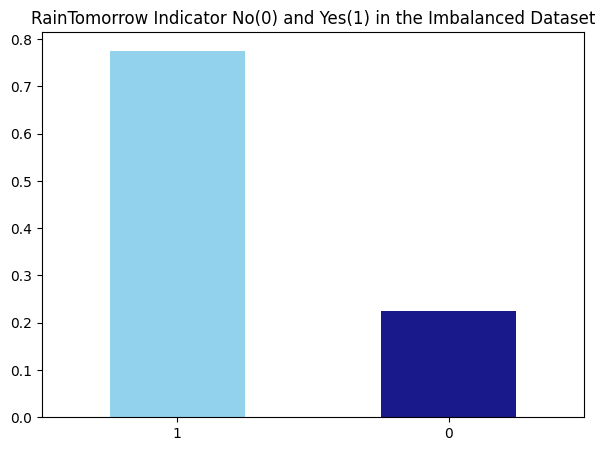

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (7,5))
full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

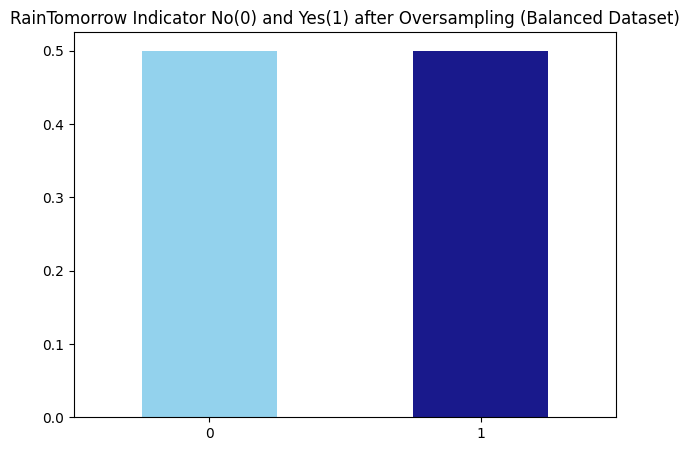

In [8]:
from sklearn.utils import resample
yes = full_data[full_data.RainTomorrow==1]
no = full_data[full_data.RainTomorrow==0]

yes_oversampled = resample(yes, replace=True, n_samples = len(no), random_state=123)
oversampled_data = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (7,5))
oversampled_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()


Checking null values


<Axes: >

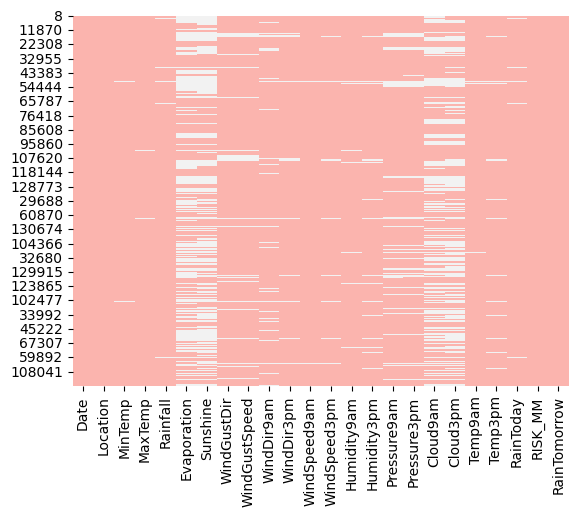

In [9]:
import seaborn as sns
sns.heatmap(oversampled_data.isnull(), cbar=False, cmap='Pastel1')

In [10]:
total = oversampled_data.isnull().sum().sort_values(ascending=False)
percent = (oversampled_data.isnull().sum()/oversampled_data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,30374,0.476425
Evaporation,27627,0.433338
Cloud3pm,24822,0.389340
Cloud9am,23530,0.369075


In [11]:
object_cols = oversampled_data.select_dtypes(include=['object']).columns
print(object_cols)


Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')


In [12]:
for val in range(0,len(object_cols)):
  oversampled_data[object_cols[val]] = oversampled_data[object_cols[val]].fillna(oversampled_data[object_cols[val]].mode()[0])




In [13]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled_data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled_data[col] = lencoders[col].fit_transform(oversampled_data[col])

In [14]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled_data.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled_data)
df = pd.DataFrame(MiceImputed, columns=oversampled_data.columns)
df[df.index.duplicated()]



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
141878,3015.0,41.0,11.3,23.5,0.0,8.623119,4.800423,0.0,48.000000,9.0,...,23.0,1022.6,1020.5,8.000000,8.000000,16.2,22.5,1.0,0.0,1.0
37388,1872.0,42.0,2.3,16.0,0.0,1.600000,3.800000,2.0,19.000000,0.0,...,57.0,1023.4,1020.6,7.000000,7.000000,6.7,15.7,1.0,0.0,1.0
44527,105.0,9.0,5.0,20.9,0.0,2.000000,8.900000,14.0,22.000000,3.0,...,42.0,1019.9,1014.3,7.000000,6.000000,10.1,20.6,1.0,0.2,1.0
4243,1597.0,4.0,2.6,16.8,0.0,2.250142,8.469739,15.0,37.000000,1.0,...,46.0,1016.7,1016.3,3.551460,3.954119,10.7,16.4,1.0,0.0,1.0
17767,401.0,26.0,19.4,26.4,0.2,4.976829,6.264108,1.0,20.000000,4.0,...,73.0,1017.4,1016.3,5.722590,4.983602,22.1,25.2,1.0,0.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90277,2753.0,14.0,22.3,29.8,0.0,6.410663,7.794125,5.0,39.000000,5.0,...,70.0,1015.9,1012.2,4.994734,4.829166,27.8,27.5,1.0,0.0,1.0
28069,1886.0,34.0,2.4,16.9,0.0,0.800000,6.097273,1.0,17.000000,3.0,...,63.0,1036.0,1032.2,4.771238,4.281728,5.2,16.3,1.0,0.2,1.0
54807,1432.0,5.0,14.0,29.6,0.0,6.613234,10.705643,9.0,37.000000,2.0,...,26.0,1019.1,1016.5,2.000000,2.658111,17.1,28.0,1.0,0.0,1.0
139926,2572.0,16.0,17.0,33.5,0.0,7.200000,10.206990,9.0,35.000000,2.0,...,30.0,1015.6,1011.9,3.000000,4.000000,24.5,33.0,1.0,0.0,1.0


<Axes: >

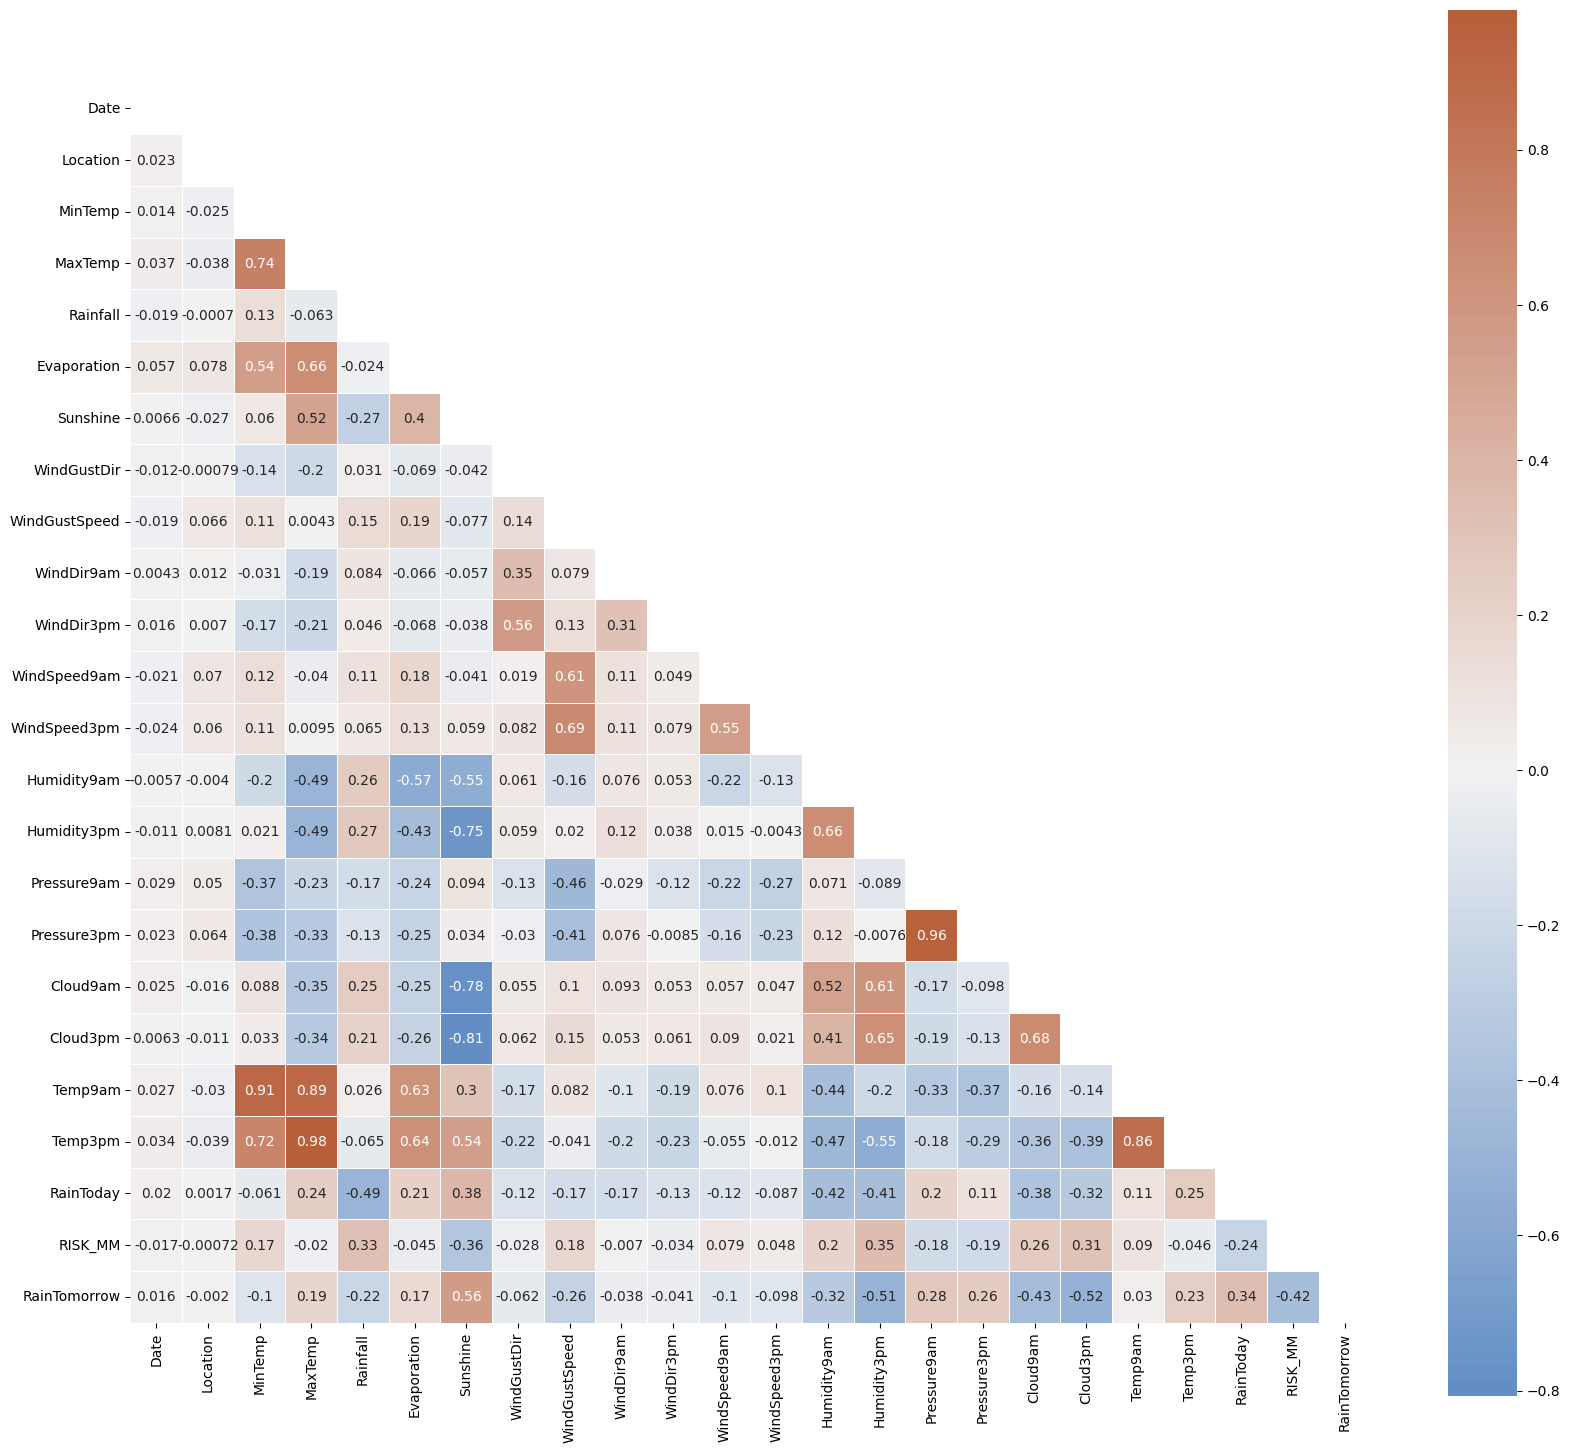

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [16]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00250935 0.00252843 0.00328233 0.00360045 0.01892331 0.0031346
 0.07722853 0.00158267 0.0114141  0.00175366 0.00174737 0.0018915
 0.00237442 0.01128154 0.03973824 0.011669   0.01338123 0.0235426
 0.05247909 0.0030912  0.00453305 0.00934505 0.69896828]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [20]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [39]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def run_model(model,X_train,y_train,X_test,y_test,verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)

    y_pred=model.predict(X_test)
    accuracy_scor = accuracy_score(y_test,y_pred)
    roc_auc_scor = roc_auc_score(y_test,y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy_scor))
    print("ROC Area under Curve = {}".format(roc_auc_scor))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=model.classes_)
    disp.plot()
    plt.show()
    return model, accuracy_scor, roc_auc_scor, time_taken



Accuracy = 0.9952318213187779
ROC Area under Curve = 0.9952512571486917
Time taken = 1.293259859085083
              precision    recall  f1-score   support

         0.0    0.99354   0.99682   0.99518      7871
         1.0    0.99689   0.99368   0.99528      8068

    accuracy                        0.99523     15939
   macro avg    0.99522   0.99525   0.99523     15939
weighted avg    0.99524   0.99523   0.99523     15939



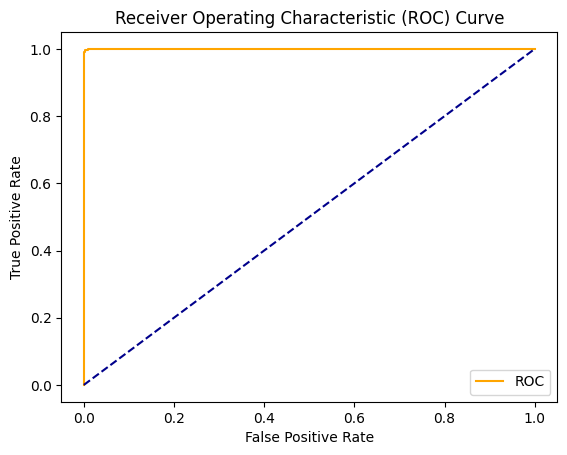

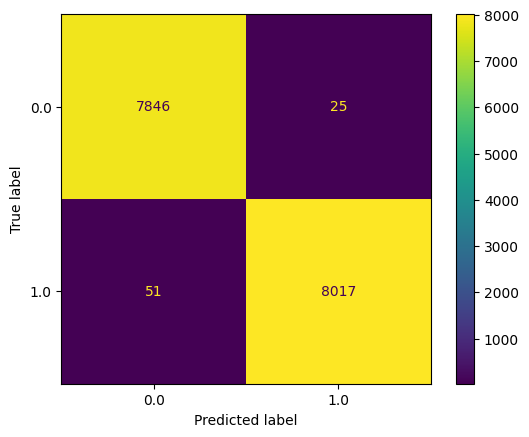

Accuracy = 0.9819311123658949
ROC Area under Curve = 0.9819469649637339
Time taken = 0.1611795425415039
              precision    recall  f1-score   support

         0.0    0.98024   0.98323   0.98173      7871
         1.0    0.98359   0.98066   0.98213      8068

    accuracy                        0.98193     15939
   macro avg    0.98192   0.98195   0.98193     15939
weighted avg    0.98194   0.98193   0.98193     15939



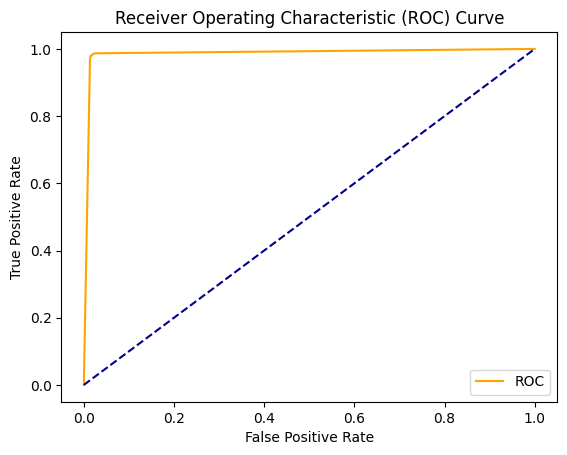

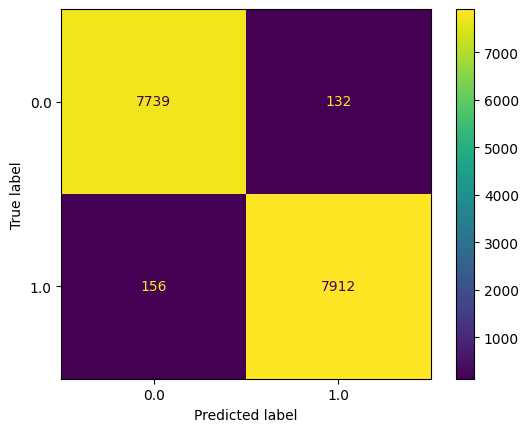

Accuracy = 0.9998745216136521
ROC Area under Curve = 0.9998729513403634
Time taken = 38.48742055892944
              precision    recall  f1-score   support

         0.0    1.00000   0.99975   0.99987      7871
         1.0    0.99975   1.00000   0.99988      8068

    accuracy                        0.99987     15939
   macro avg    0.99988   0.99987   0.99987     15939
weighted avg    0.99987   0.99987   0.99987     15939



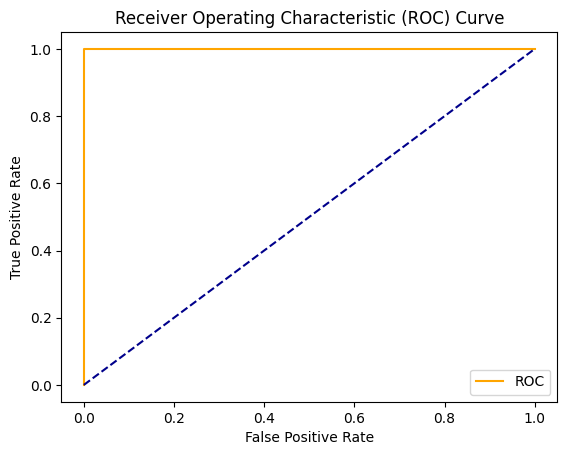

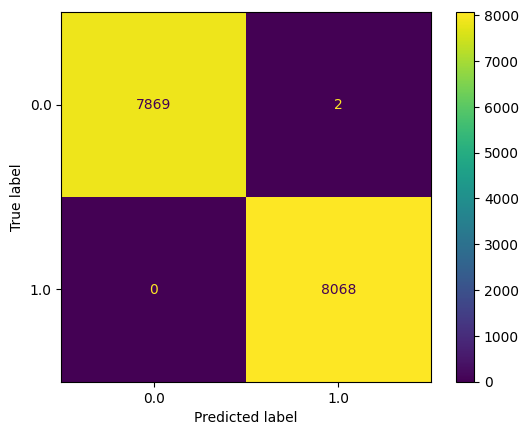

Accuracy = 0.999937260806826
ROC Area under Curve = 0.9999364756701816
Time taken = 6.303575038909912
              precision    recall  f1-score   support

         0.0    1.00000   0.99987   0.99994      7871
         1.0    0.99988   1.00000   0.99994      8068

    accuracy                        0.99994     15939
   macro avg    0.99994   0.99994   0.99994     15939
weighted avg    0.99994   0.99994   0.99994     15939



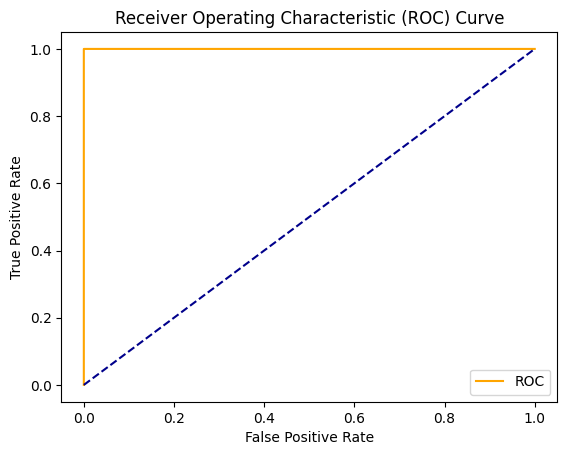

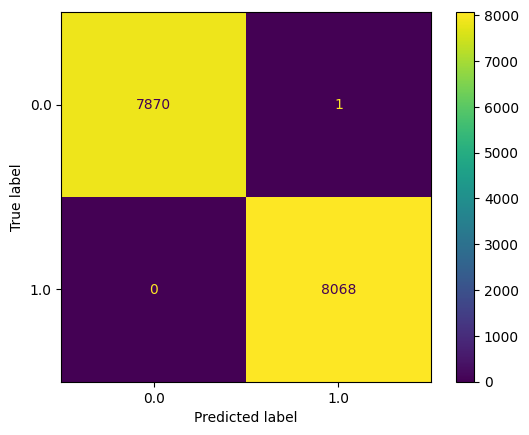

In [40]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr,accuracy_lr,roc_auc_lr,tt_lr= run_model(model_lr,X_train,y_train,X_test,y_test)


from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 16,
             'max_features': "sqrt"}
model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt,tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)





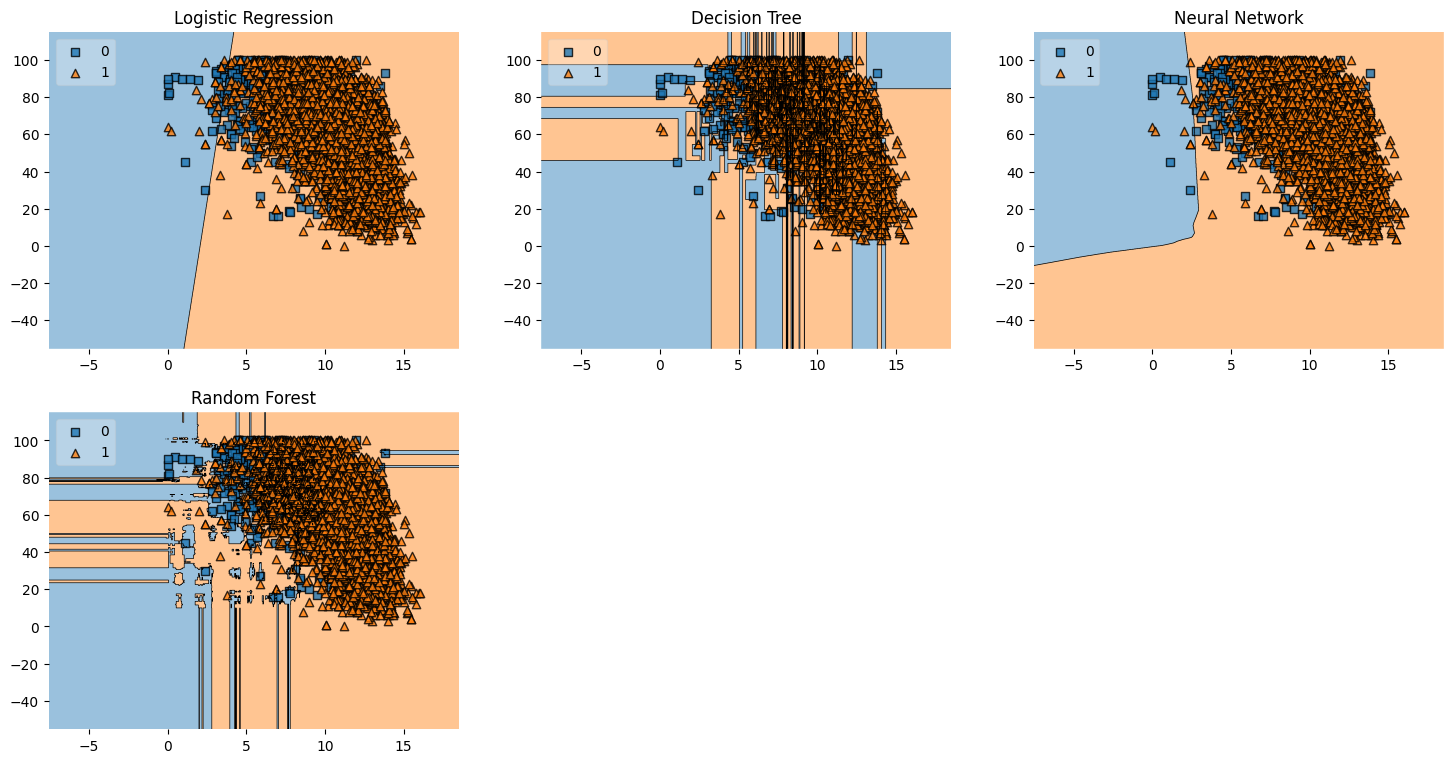

In [41]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from mlxtend.plotting import plot_decision_regions
value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=12345)
clf2 = DecisionTreeClassifier(random_state=12345)
clf3 = MLPClassifier(random_state=12345, verbose = 0)
clf4 = RandomForestClassifier(random_state=12345)

X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1,2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf,
                                filler_feature_values={2: value},
                                filler_feature_ranges={2: width},
                                legend=2)
    plt.title(lab)

plt.show()

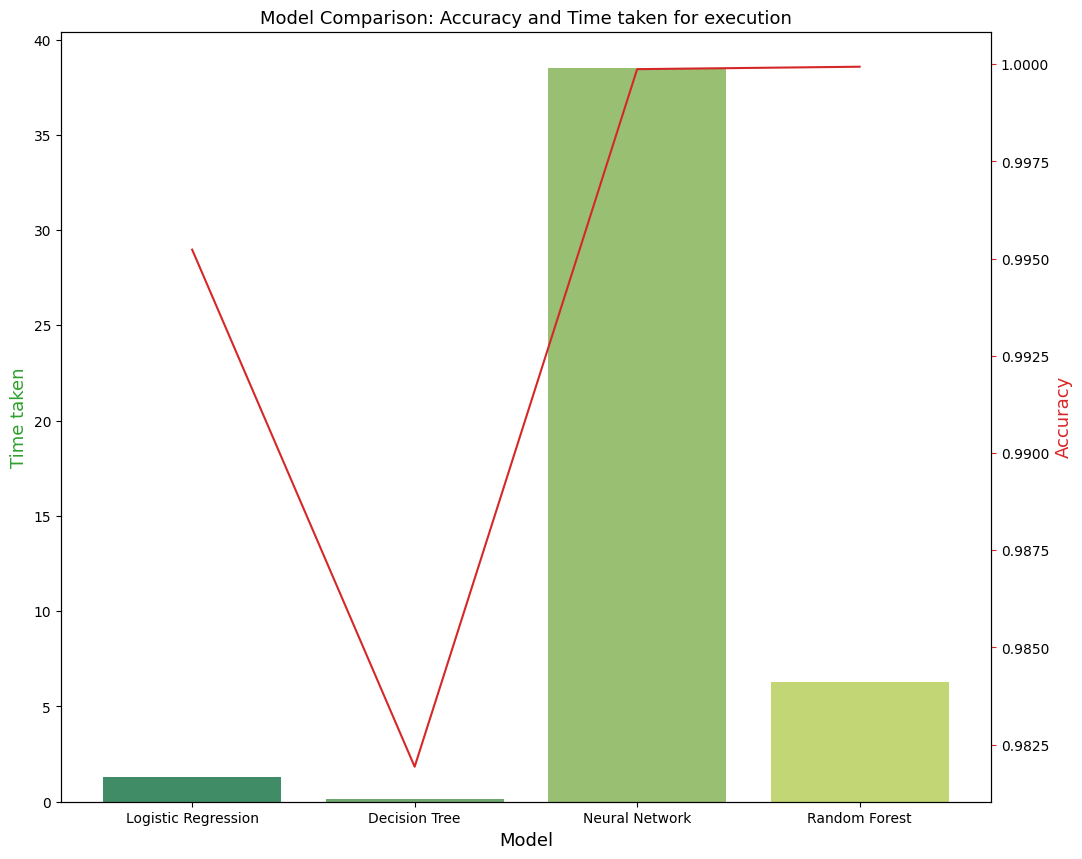

In [42]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf]
tt = [tt_lr, tt_dt, tt_nn, tt_rf]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)